# Buffer Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from slugify import slugify

import pylandstats as pls

sns.set()

In [3]:
year_code = '18'
city_slugs = ['basel', 'bern', 'geneve', 'lausanne', 'zurich']
buffer_dists = [5000, 10000, 15000, 20000]
class_metrics = [
    'area_mn', 'proportion_of_landscape', 'largest_patch_index',
    'edge_density', 'fractal_dimension_am',
    'euclidean_nearest_neighbor_mn', 'landscape_shape_index',
    'number_of_patches', 'patch_density'
]
landscape_metrics = ['contagion', 'shannon_diversity_index']

In [4]:
gdf = gpd.read_file('../data/raw/gmb/g1a18.shp')

In [5]:
city_ba_dict = {
    city_slug : pls.BufferAnalysis(
        '../data/processed/agglomeration_extracts/'
        f'{city_slug}/{year_code}/{year_code}.tif',
        base_mask=gdf[gdf['GMDNAME'].apply(slugify) == city_slug]['geometry'],
        buffer_dists=buffer_dists
    )
    for city_slug in city_slugs
}

In [6]:
len(class_metrics + landscape_metrics)

11

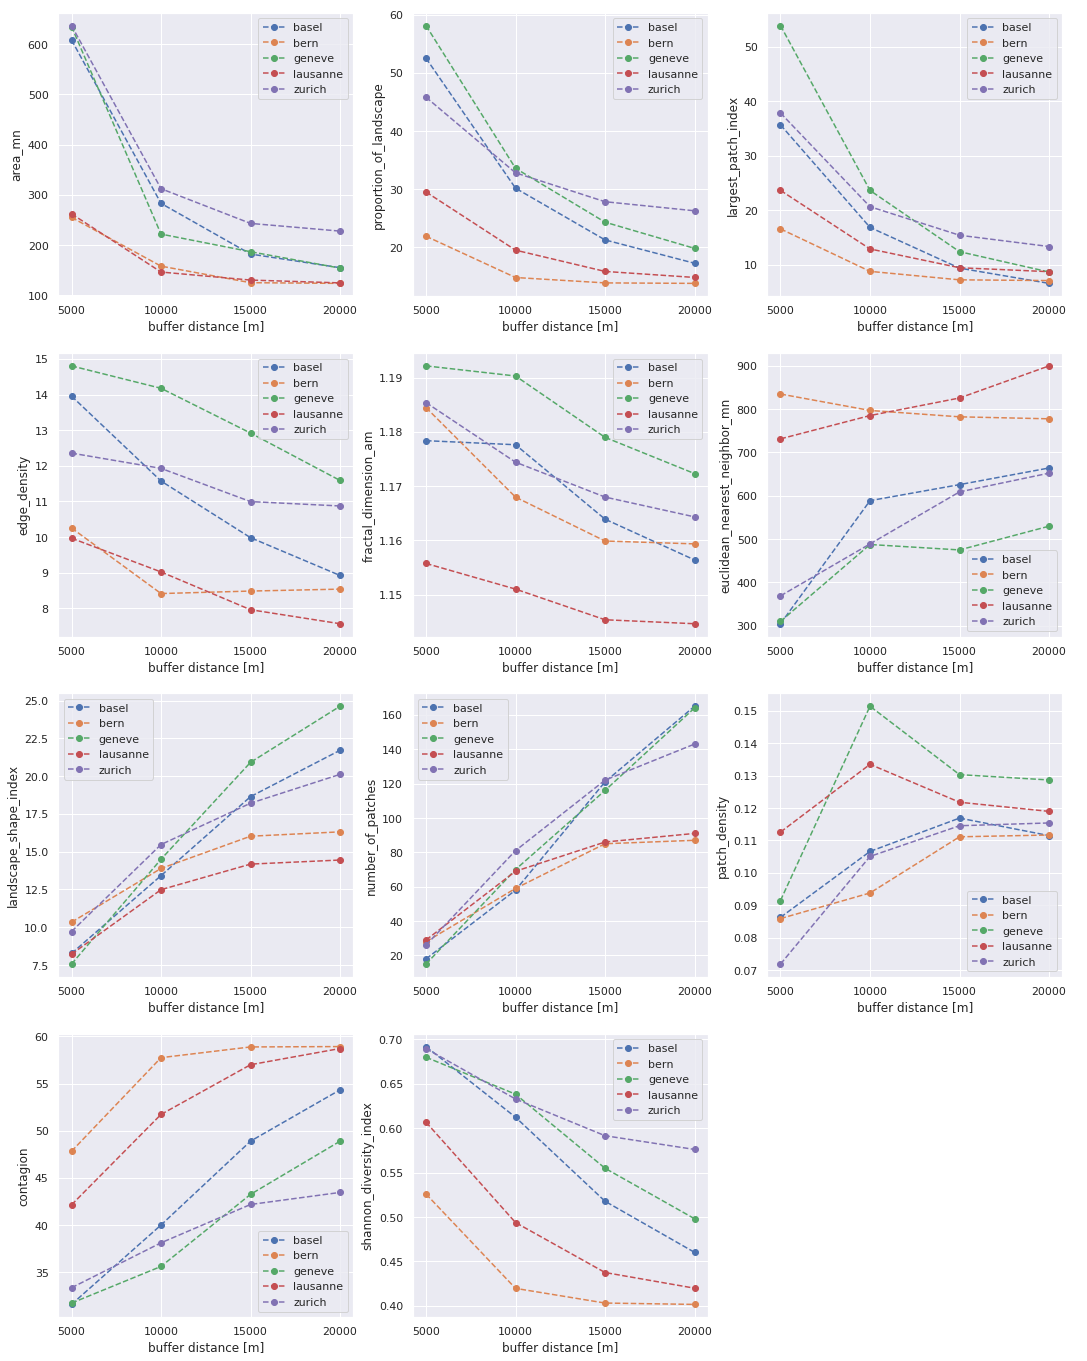

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(3 * 6, 6 * 4))
plt.setp(axes, xticks=buffer_dists, xlabel="buffer distance [m]")
# fig.subplots_adjust()

flat_axes = axes.flat

for i, metric in enumerate(class_metrics):
    for city_slug in city_slugs:
        city_ba_dict[city_slug].plot_metric(metric, class_val=1, ax=flat_axes[i], plot_kws={'label': city_slug})

    flat_axes[i].legend()

for i, metric in enumerate(landscape_metrics, start=len(class_metrics)):
    for city_slug in city_slugs:
        city_ba_dict[city_slug].plot_metric(metric, ax=flat_axes[i], plot_kws={'label': city_slug})
        
    flat_axes[i].legend()
        
for i in range(len(class_metrics + landscape_metrics), len(flat_axes)):
    flat_axes[i].axis('off')

In [8]:
sns.set_style({'axes.grid': False, 'image.cmap': 'ocean_r'})

(<Figure size 1728x288 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe727b76128>,
       dtype=object))

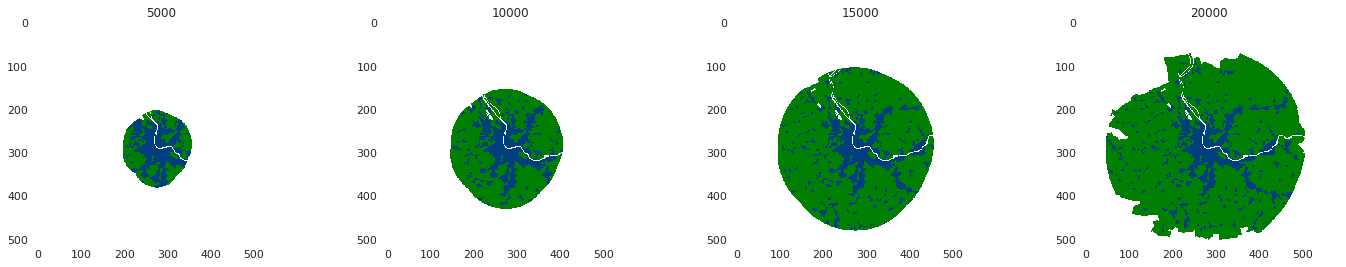

In [9]:
city_ba_dict['basel'].plot_landscapes()

(<Figure size 1728x288 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe727b2fb00>,
       dtype=object))

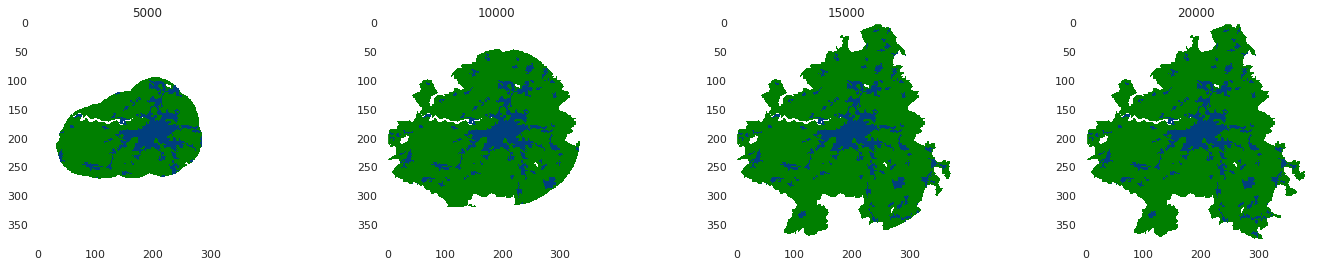

In [10]:
city_ba_dict['bern'].plot_landscapes()

(<Figure size 1728x288 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe724159cc0>,
       dtype=object))

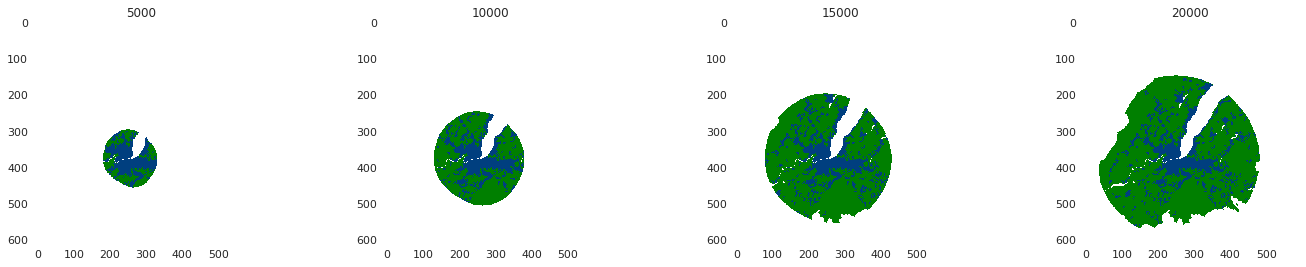

In [11]:
city_ba_dict['geneve'].plot_landscapes()

(<Figure size 1728x288 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe724038978>,
       dtype=object))

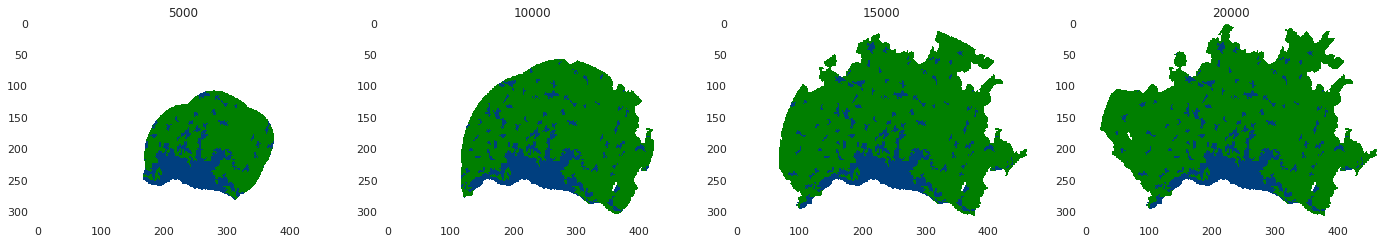

In [12]:
city_ba_dict['lausanne'].plot_landscapes()

(<Figure size 1728x288 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe71f696358>,
       dtype=object))

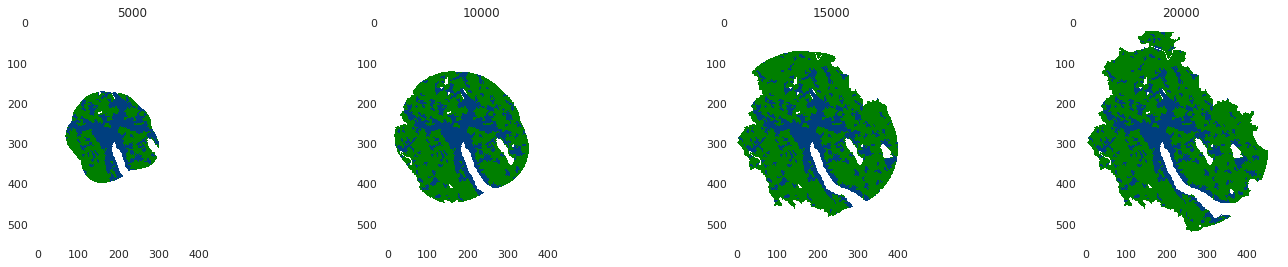

In [13]:
city_ba_dict['zurich'].plot_landscapes()